<a href="https://colab.research.google.com/github/luisalfredoo/03MAIR-Algoritmos-de-Optimizacion-2020/blob/master/AG2/luis_alfredo_osorio_jaramillo_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ACTIVIDAD GUIADA 2
## LUIS ALFREDO OSORIO JARAMILLO AG-2
### https://colab.research.google.com/drive/11-6yXXbsf_m-GwayPdKlAXWMH1z-eLaa#scrollTo=3CA4Urg39ZlA
### https://github.com/luisalfredoo

In [ ]:
# programacion dinamica  CAMINO MAS CORTO
def precios(TARIFAS):
  N = len(TARIFAS[0])
  PRECIOS = [[9999]*N for i in [9999]*N]
  RUTA = [['']*N for i in ['']*N]
  for i in range(N-1):
    for j in range(i+1,N):
      MIN=TARIFAS[i][j]
      RUTA[i][j]=i
      
      for k in range(i,j):
        if PRECIOS[i][k]+TARIFAS[k][j] < MIN:
          MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j])
          RUTA[i][j]=k
        PRECIOS[i][j]=MIN
  return PRECIOS,RUTA

TARIFAS=[[0,5,4,3,99,99,99],
         [99,0,99,2,3,99,11],
         [99,99,0,1,99,4,10],
         [99,99,99,0,5,6,9],
         [99,99,99,99,0,99,4],
         [99,99,99,99,99,0,3],
         [99,99,99,99,99,99,0]]



In [ ]:
def calcular_ruta(RUTA,desde,hasta):
  if desde == hasta : 
    return desde
  else: 
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) + ',' + str(RUTA[desde][hasta])

print("\nLa Ruta es : " )
calcular_ruta(RUTA,0,6)


## RAMIFICACION Y PODA

In [38]:
from time import time

def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]
  return VALOR 

COSTES =[[11,12,18,40],[14,15,13,22],[11,17,19,23],[17,14,20,28]]

start_time = time()
print( valor((0,1,2,3),COSTES) )
run_time = time() - start_time
print("Calculo valor: %.10f seconds." % run_time)


73
Calculo valor: 0.0001809597 seconds.


In [56]:
# Fuerza Bruta
from itertools import combinations,permutations

def fuerza_bruta(COSTES):
  mejorvalor = 10e10
  mejorsolucion = ()
  for s in list(permutations(range(len(COSTES)),4)):
    valortmp = valor(s,COSTES)
    if valortmp < mejorvalor :
      mejorvalor = valortmp
      mejorsolucion = s 

  print('mejor solucion: ' , mejorsolucion , ' con valor:' , mejorvalor )

start_time = time()
fuerza_bruta(COSTES)
run_time = time() - start_time
print("Calculo valor: %.10f seconds." % run_time)


mejor solucion:  (0, 2, 3, 1)  con valor: 61
Calculo valor: 0.0002908707 seconds.


In [43]:
#Funcion para estimar cota inferior de una solucion Parcial
def CI(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]
  for i in range(len(COSTES)):
    if i not in S :
      VALOR += min([ COSTES[j][i] for j in range(len(S), len(COSTES)) ])
  return VALOR 

print(CI((1,3),COSTES))

64


In [41]:
#Funcion para Ramificar
def crear_hijos(NODO,N):
  HIJOS = []
  for i in range(N):
    if i not in NODO :
      HIJOS.append({'s':NODO + (i,) })
  return HIJOS 


In [57]:
def ramificacion_y_poda(COSTES):
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION = tuple( i for i in range(len(COSTES)))
  cotaSup = valor(MEJOR_SOLUCION , COSTES )

  NODOS = []
  NODOS.append({ 's':() , 'ci':CI((),COSTES )})
  iteracion = 0

  while (len(NODOS) > 0 ) :
    iteracion += 1
    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci'] ) ][0]['s']

    HIJOS = [ {'s':x['s'], 'ci':CI(x['s'], COSTES)} for x in crear_hijos(nodo_prometedor,DIMENSION)  ]

    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION ]
    if len(NODO_FINAL) > 0 :
      if NODO_FINAL[0]['ci'] < cotaSup :
        cotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL
    
    HIJOS = [x for x in HIJOS if x['ci'] < cotaSup]

    NODOS.extend(HIJOS)

    NODOS = [ x for x in NODOS if x['s'] != nodo_prometedor ]

  print('solucion final es: ', MEJOR_SOLUCION , ' en ' , iteracion , ' iteraciones', ' para Dimension: ' , DIMENSION )

start_time = time()
ramificacion_y_poda(COSTES)
run_time = time() - start_time
print("Calculo valor: %.10f seconds." % run_time)
  

solucion final es:  [{'s': (0, 2, 3, 1), 'ci': 61}]  en  14  iteraciones  para Dimension:  4
Calculo valor: 0.0009469986 seconds.


## Analisis

Complejidad Fuerza Burta es :  $O(n^2)$



In [58]:
# Generacion de Matrices aleatorias

import numpy as np
COSTES5 = np.random.randint(100,size=(15,15))  # Matriz aleatoria de 15x15 numeros entre 0 y 100

start_time = time()
fuerza_bruta(COSTES5)
run_time = time() - start_time
print("Calculo Fuerza Bruta: %.10f seconds." % run_time , ' \n')


mejor solucion:  (0, 13, 2, 9)  con valor: 42
Calculo Fuerza Bruta: 0.0943853855 seconds.  



In [59]:
start_time = time()
ramificacion_y_poda(COSTES5)
run_time = time() - start_time
print("Calculo Ramificacion y Poda: %.10f seconds." % run_time)

solucion final es:  [{'s': (8, 2, 7, 0, 9, 1, 5, 11, 12, 4, 6, 14, 10, 13, 3), 'ci': 145}]  en  4256  iteraciones  para Dimension:  15
Calculo Ramificacion y Poda: 3.4852499962 seconds.


Se realizan varias pruebas con estos resultados y finalmente para una matrix de 15x15

Calculo Fuerza Bruta: 0.0943853855 seconds.

Calculo Ramificacion y Poda: 3.4852499962 seconds.

Lo cual muestra que en el agoritmo de ramificacion y poda al cambiar la Dimension de 4 a 15 su tiempo de ejecucion aumento un 3001%.

## Descenso del Gradiente - Practica



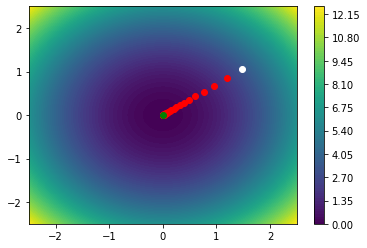

Solucion: [5.2118296091049355e-49, 3.7073328327788124e-49] 4.090748460734268e-97


In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random

f= lambda X: X[0]**2+X[1]**2
df= lambda X: [2*X[0] , 2*X[1]]

resolucion = 100
rango=2.5
X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

P=[random.uniform(-2,2) , random.uniform(-2,2)]
plt.plot(P[0],P[1],'o',c='white')

TA = .1
for _ in range(500):
  grad = df(P)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],'o',c='red')

plt.plot(P[0],P[1],'o',c='green')
plt.show()

print('Solucion:' , P , f(P))










In [ ]:
f = lambda X: np.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 +3) * np.cos(2*X[0]+1-np.e**X[1]   )

def df(PUNTO):
  h = 0.01
  T = np.copy(PUNTO)
  grad = np.zeros(2)
  for it,th in enumerate(PUNTO):
    T[it] = T[it]+h 
    grad[it] = (f[T] - f(PUNTO)) / h 
  return grad

resolucion = 100
rango=2.5
X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

P=[random.uniform(-2,2) , random.uniform(-2,2)]
plt.plot(P[0],P[1],'o',c='white')

TA = .1
for _ in range(500):
  grad = df(P)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],'o',c='red')

plt.plot(P[0],P[1],'o',c='green')
plt.show()

print('Solucion:' , P , f(P))

